In [1]:
!mkdir -p data/
!wget -nc -O data/2016_manhattan.xls http://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2016/2016_manhattan.xls
!wget -nc -O data/2015_manhattan.xls http://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2015/2015_manhattan.xls
!wget -nc -O data/2014_manhattan.xls http://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2014/2014_manhattan.xls

File `data/2016_manhattan.xls' already there; not retrieving.
File `data/2015_manhattan.xls' already there; not retrieving.
File `data/2014_manhattan.xls' already there; not retrieving.


In [2]:
import glob
import pandas as pd
pd.options.display.max_columns = None

In [3]:
files = glob.glob("data/*.xls")
dfs = [pd.read_excel(f, skiprows=4) for f in files]

for df in dfs:
    df.columns = ["_".join(x.strip().split(" ")) for x in df.columns]

manhattan_sales = pd.concat(dfs)

In [24]:
len(manhattan_sales)

88556

In [25]:
len(manhattan_sales.drop_duplicates())

83238

In [65]:
import matplotlib 
%matplotlib inline
manhattan_sales["SALE_MONTH"] = manhattan_sales["SALE_DATE"].apply(lambda x: str(x.year) + "-" + str(x.month))

yorkville_hoods = manhattan_sales[manhattan_sales["NEIGHBORHOOD"].str.contains("UPPER EAST")]["NEIGHBORHOOD"].unique()
yorkville_sales = manhattan_sales[manhattan_sales["NEIGHBORHOOD"].isin(yorkville_hoods)].drop_duplicates()
sales_means = yorkville_sales.groupby("SALE_MONTH").median()["SALE_PRICE"]
sales_means.index = sales_means.index.map(lambda x: pd.to_datetime(x))

Text(0,0.5,u'Price ($$$)')

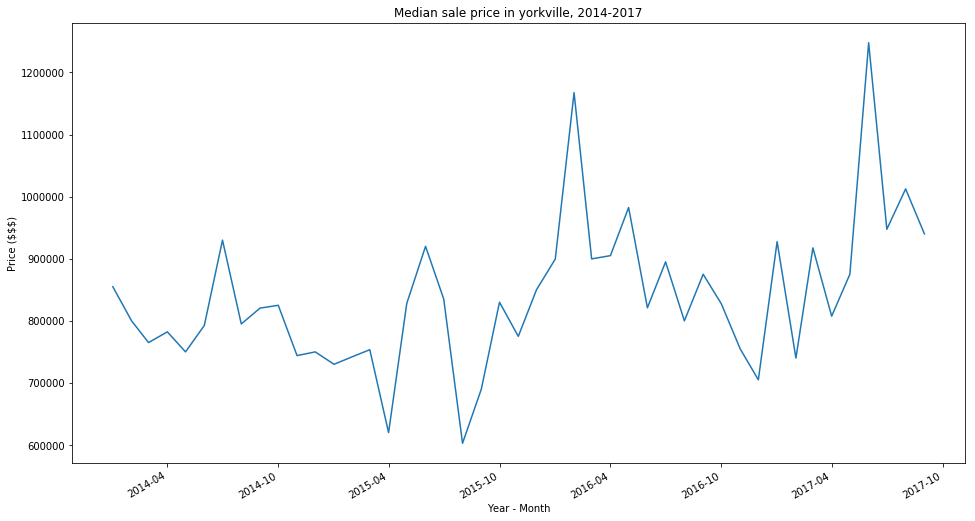

In [68]:
ax = sales_means.plot(figsize=(16, 9))
ax.set_title("Median sale price in yorkville, 2014-2017")
ax.set_xlabel("Year - Month")
ax.set_ylabel("Price ($$$)")

In [59]:
yorkville_sales[(yorkville_sales["SALE_PRICE"] < 1000000) & (yorkville_sales["SALE_PRICE"] > 100000)]

array([u'UPPER EAST SIDE (59-79)  ', u'UPPER EAST SIDE (79-96)  ',
       u'UPPER EAST SIDE (96-110) '], dtype=object)

In [83]:
def gen_median_plot(df, title=None):
    sales_group = df.groupby("SALE_MONTH")
    sales_means = sales_group.median()["SALE_PRICE"]
    sales_means.index = sales_means.index.map(lambda x: pd.to_datetime(x))
    ax = sales_means.plot(figsize=(16, 9))
    title = title if title else "Median sale price in yorkville, 2014-2017"
    ax.set_title(title)
    ax.set_xlabel("Year - Month")
    ax.set_ylabel("Price ($$$)")
    return sales_group["SALE_PRICE"].count().to_frame().swapaxes(0, 1)

SALE_MONTH,2014-1,2014-10,2014-11,2014-12,2014-2,2014-3,2014-4,2014-5,2014-6,2014-7,2014-8,2014-9,2015-1,2015-10,2015-11,2015-12,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,2015-9,2016-1,2016-10,2016-11,2016-12,2016-2,2016-3,2016-4,2016-5,2016-6,2016-7,2016-8,2016-9,2017-1,2017-2,2017-3,2017-4,2017-5,2017-6,2017-7,2017-8,2017-9
SALE_PRICE,46,48,51,42,43,54,51,49,57,54,65,40,41,68,45,43,34,42,30,46,53,81,144,94,30,62,50,64,39,25,27,29,35,28,42,35,30,45,34,26,42,31,28,35,12


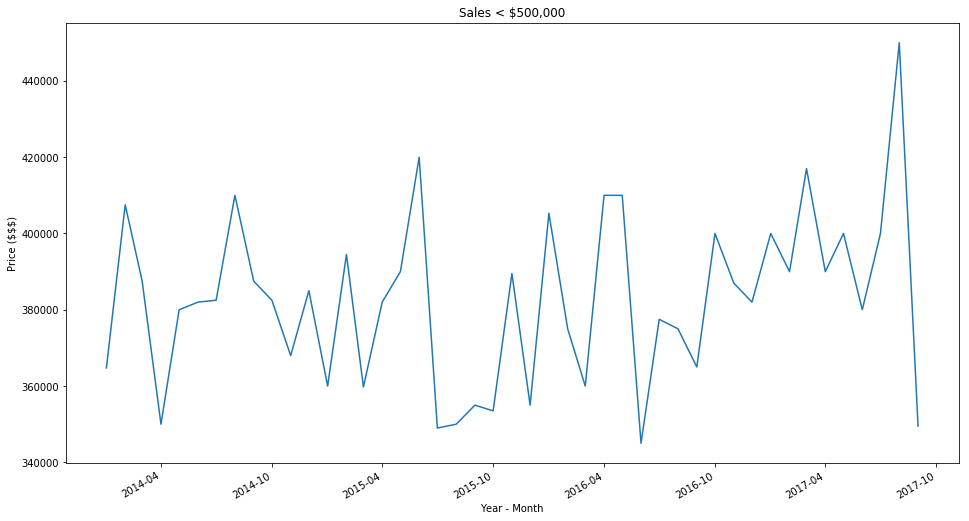

In [86]:
sub_1m = yorkville_sales[(yorkville_sales["SALE_PRICE"] < 500000) & (yorkville_sales["SALE_PRICE"] > 100000)]
gen_median_plot(sub_1m, title="Sales < $500,000")

SALE_MONTH,2014-1,2014-10,2014-11,2014-12,2014-2,2014-3,2014-4,2014-5,2014-6,2014-7,2014-8,2014-9,2015-1,2015-10,2015-11,2015-12,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,2015-9,2016-1,2016-10,2016-11,2016-12,2016-2,2016-3,2016-4,2016-5,2016-6,2016-7,2016-8,2016-9,2017-1,2017-2,2017-3,2017-4,2017-5,2017-6,2017-7,2017-8,2017-9
SALE_PRICE,84,90,56,81,63,60,74,85,107,106,93,68,66,72,74,107,71,70,78,77,90,118,95,85,101,100,101,124,55,97,76,70,83,88,98,86,69,57,62,69,104,82,83,105,54


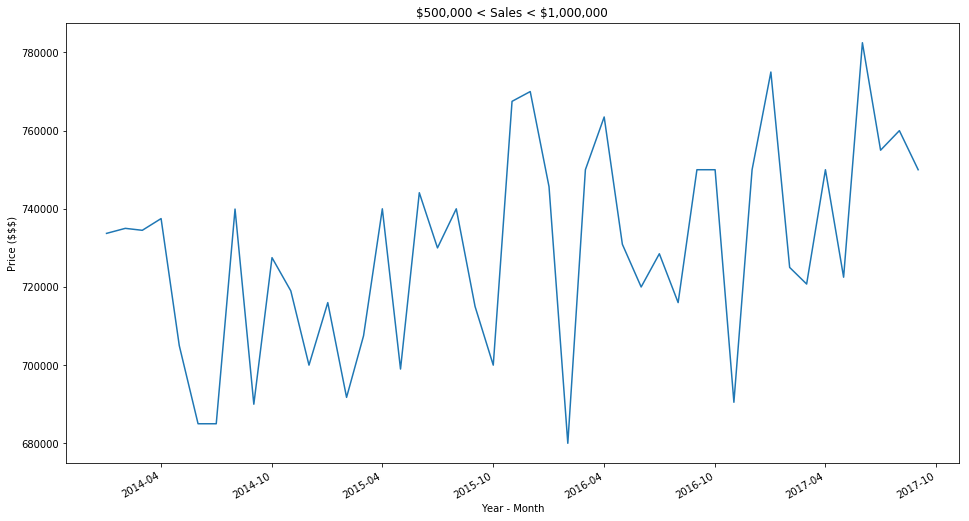

In [91]:
sub_1m = yorkville_sales[(yorkville_sales["SALE_PRICE"] > 500000) & (yorkville_sales["SALE_PRICE"] < 1000000)]
gen_median_plot(sub_1m, title="\$500,000 < Sales < \$1,000,000")

SALE_MONTH,2014-1,2014-10,2014-11,2014-12,2014-2,2014-3,2014-4,2014-5,2014-6,2014-7,2014-8,2014-9,2015-1,2015-10,2015-11,2015-12,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,2015-9,2016-1,2016-10,2016-11,2016-12,2016-2,2016-3,2016-4,2016-5,2016-6,2016-7,2016-8,2016-9,2017-1,2017-2,2017-3,2017-4,2017-5,2017-6,2017-7,2017-8,2017-9
SALE_PRICE,74,68,46,59,56,45,44,62,68,82,72,43,40,54,50,84,41,46,47,44,75,81,74,59,78,76,74,73,60,63,54,74,75,73,67,65,56,43,56,42,71,87,63,76,23


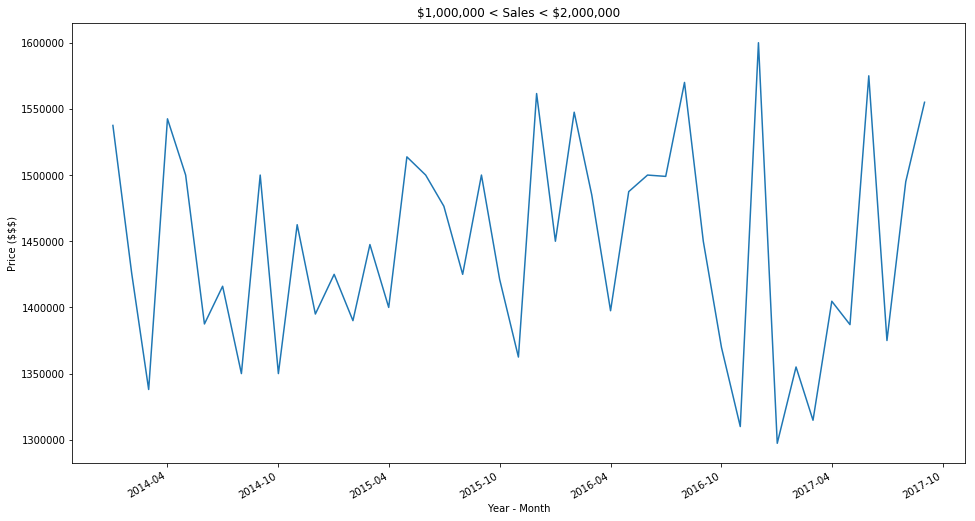

In [90]:
sub_1m = yorkville_sales[(yorkville_sales["SALE_PRICE"] > 1000000) & (yorkville_sales["SALE_PRICE"] < 2000000)]
gen_median_plot(sub_1m, title="\$1,000,000 < Sales < \$2,000,000")